In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pathlib
data_dir = pathlib.Path('/content/drive/MyDrive/Colab Notebooks/Ras Anjing/Data Ras Anjing')

In [4]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1, rotation_range=20,
                             width_shift_range=0.1, height_shift_range=0.2,
                             shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

train_generator = datagen.flow_from_directory(data_dir, target_size=(224, 224), batch_size=32, class_mode='categorical',subset='training')
val_generator = datagen.flow_from_directory(data_dir, target_size=(224, 224), batch_size=32, class_mode='categorical', subset='validation')

Found 488 images belonging to 8 classes.
Found 48 images belonging to 8 classes.


In [5]:
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model = Sequential()
model.add(vgg_base)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))

vgg_base.trainable = False

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

58889256/58889256 [==============================] - 0s 0us/step


In [6]:
history = model.fit(train_generator, epochs=50, validation_data=val_generator)

Epoch 1/50
16/16 [==============================] - 362s 22s/step - loss: 2.3994 - accuracy: 0.1598 - val_loss: 1.8953 - val_accuracy: 0.2708
Epoch 2/50
16/16 [==============================] - 333s 21s/step - loss: 1.9665 - accuracy: 0.2541 - val_loss: 1.8208 - val_accuracy: 0.3958
Epoch 3/50
16/16 [==============================] - 327s 20s/step - loss: 1.6664 - accuracy: 0.4098 - val_loss: 1.5249 - val_accuracy: 0.4583
Epoch 4/50
16/16 [==============================] - 321s 20s/step - loss: 1.5255 - accuracy: 0.4467 - val_loss: 1.6708 - val_accuracy: 0.3542
Epoch 5/50
16/16 [==============================] - 328s 21s/step - loss: 1.4272 - accuracy: 0.5082 - val_loss: 1.4974 - val_accuracy: 0.5625
Epoch 6/50
16/16 [==============================] - 336s 21s/step - loss: 1.3420 - accuracy: 0.5369 - val_loss: 1.3821 - val_accuracy: 0.5000
Epoch 7/50
16/16 [==============================] - 327s 21s/step - loss: 1.2958 - accuracy: 0.5492 - val_loss: 1.2240 - val_accuracy: 0.5000
Epoch 

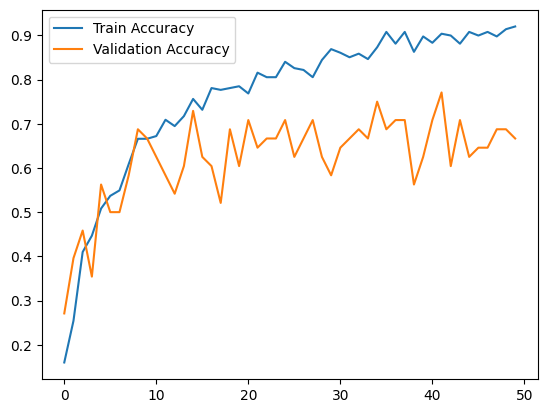

In [7]:
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(['Train Accuracy', 'Validation Accuracy'])

2/2 [==============================] - 29s 9s/step - loss: 0.7754 - accuracy: 0.7083
Validation Loss: 0.7754068374633789
Validation Accuracy: 0.7083333134651184
2/2 [==============================] - 29s 10s/step


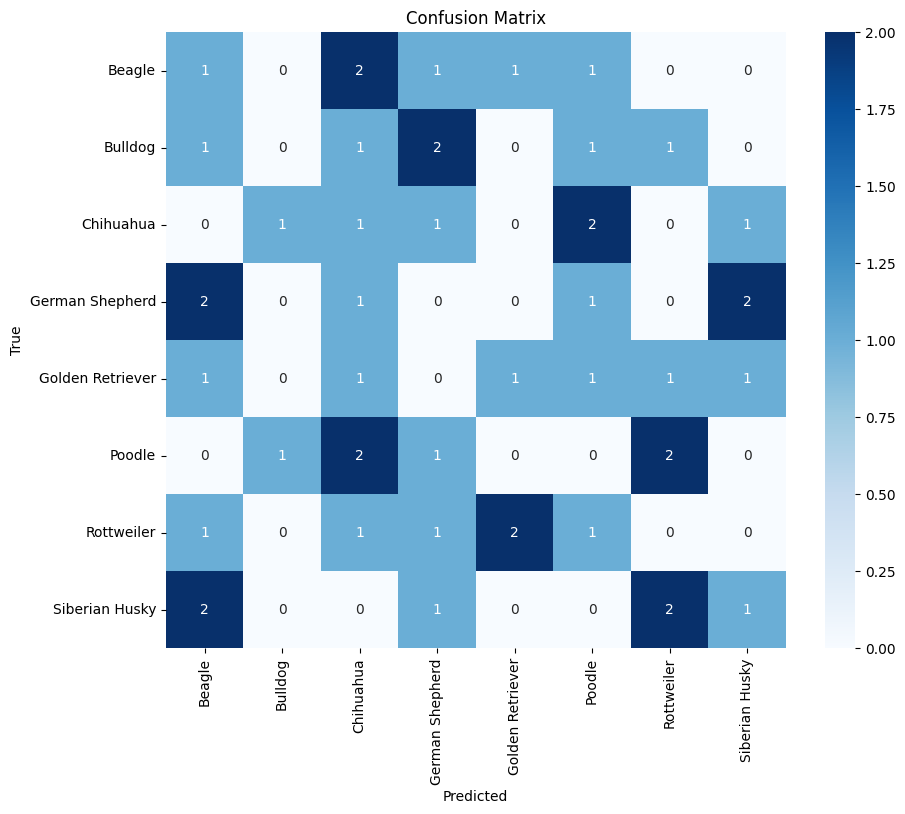

In [8]:
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

predictions = model.predict(val_generator)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

conf_matrix = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

class_labels = list(val_generator.class_indices.keys())
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

In [9]:
def predict_image(img):
  img = load_img(img, target_size=(224, 224))
  plt.imshow(img)
  plt.axis('off')
  plt.show()
  input_arr = img_to_array(img)
  input_arr = np.array([input_arr])
  prediction = model.predict(input_arr)[0]
  class_indices = {v: k for k, v in train_generator.class_indices.items()}
  max_index = np.argmax(prediction)
  result = {class_indices[max_index]: float(prediction[max_index])}
  return result

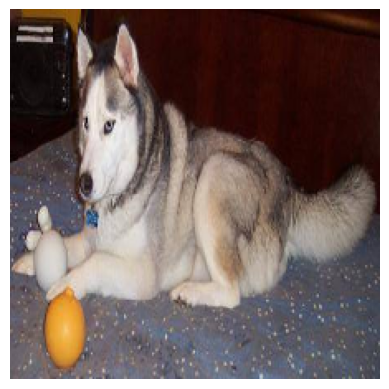

1/1 [==============================] - 1s 695ms/step


{'Siberian Husky': 1.0}

In [10]:
predict_image('/content/drive/MyDrive/Colab Notebooks/Ras Anjing/Data Ras Anjing/Siberian Husky/0c9fc0f58a6724ca680c76785a452bba.jpg')

In [11]:
model.save("Model4VGG RasAnjing.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [54]:
model.save("Model4VGG RasAnjing.keras")